# **Week 2: Numerical Data Summaries**

```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```


This is the solution notebook for [Week 2](https://colab.research.google.com/github/edelweiss611428/MXB107-Notebooks/blob/main/notebooks/Week_2.ipynb) of MXB107.

## **Pre-Configurating the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Importing Required Datasets and Packages**
**Run the following lines of code**:

In [9]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/edelweiss611428/MXB107-Notebooks.git")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

**Do not modify the following**

In [10]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr", "IRdisplay", "png") %in% loadedNamespaces()))

})

test_that("Test if all utility functions have been loaded", {
  expect_true(exists("skewness"))
  expect_true(exists("kurtosis"))
  expect_true(exists("Mode"))
  expect_true(exists("FDbinning"))
  expect_true(exists("ModeBinMidpoint"))
  expect_true(exists("empiricalRuleGaussian"))
  expect_true(exists("chebyshevRule"))
  expect_true(exists("rangeBasedSD"))
  expect_true(exists("IQRBasedSD"))
  expect_true(exists("boxPlotDescribe"))
})

Test passed 😀
Test passed 🎊


## **Workshop Questions**

### **Question 1**

The empirical rule can be extended beyond ±3 standard deviations.

| Interval | Approx. % of Data |
| -------- | ----------------- |
| ±1 SD    | 68.27%            |
| ±2 SD    | 95.45%            |
| ±3 SD    | 99.73%            |
| ±4 SD    | 99.994%           |
| ±5 SD    | 99.99994%         |
| ±6 SD    | 99.9999998%       |



The following code cell loads daily returns of `S&P 500` index from `03/01/2000` to `18/07/2025` from `s&p500.csv`, queried from Yahoo Finance.

In [11]:
sp500_dailyReturn = 100*read.csv("datasets/s&p500.csv")$daily.returns

Use the `empiricalRuleGaussian()` function to visualise the empirical rule for up to ±6 standard deviations. Compare the empirical and theoretical coverage.

Empirical coverage:
k = 1 (±1 SD): 79.39% of data
k = 2 (±2 SD): 95.10% of data
k = 3 (±3 SD): 98.40% of data
k = 4 (±4 SD): 99.32% of data
k = 5 (±5 SD): 99.66% of data
k = 6 (±6 SD): 99.81% of data


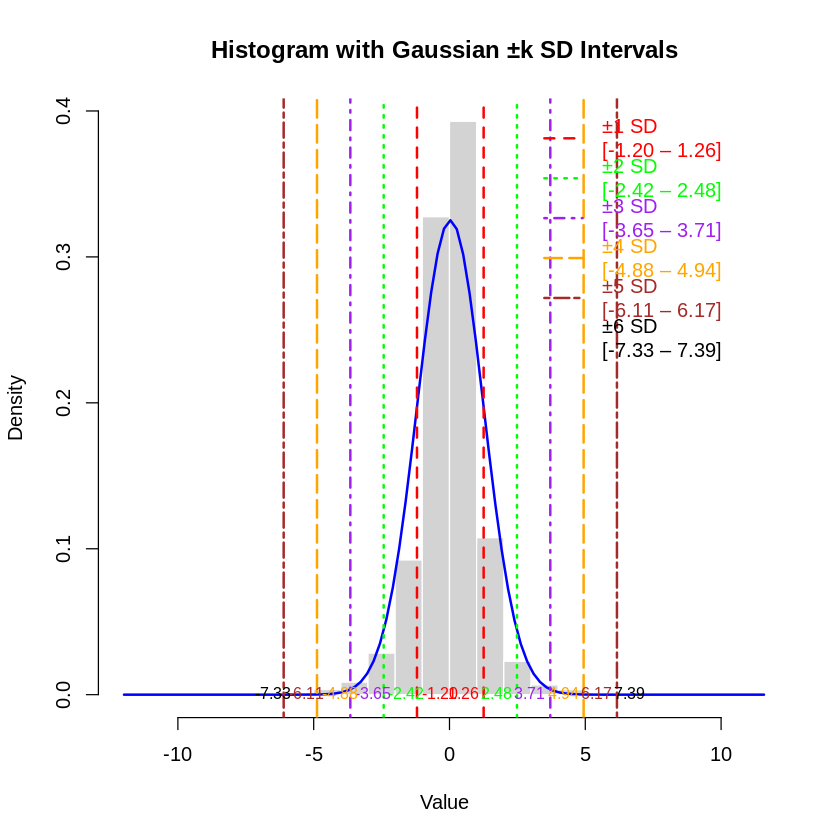

In [12]:
empiricalRuleGaussian(sp500_dailyReturn, ks = 1:6)

# The empirical rule underestimates the probability of extreme return values, which can lead to an understatement of financial risk in worst-case scenarios.

### **EPA Fuel Economy Dataset**

A dataset containing information on over 13,500 cars sold in the US from 2010 to 2020, including measurements and characteristics related to vehicle fuel economy and specifications. Data sourced from the [US Fuel Economy website](https://www.fueleconomy.gov/feg/download.shtml).

| Variable | Description                                    |
|----------|------------------------------------------------|
| `city`   | EPA measured fuel economy in miles per gallon (city driving) |
| `hwy`    | EPA measured fuel economy in miles per gallon (highway driving) |
| `cyl`    | Number of cylinders in the engine              |
| `disp`   | Engine displacement (litres)                    |
| `drive`  | Vehicle drivetrain layout (e.g., FWD, RWD, AWD) |
| `make`   | Vehicle manufacturer name                       |
| `model`  | Vehicle model name                              |
| `trans`  | Transmission type (manual or automatic)        |
| `year`   | Vehicle model year                              |


In [13]:
epa_data = read.csv("./datasets/epa_data.csv")
str(epa_data)

'data.frame':	13569 obs. of  9 variables:
 $ city : int  16 15 16 19 19 19 19 19 19 19 ...
 $ hwy  : int  24 22 22 27 29 24 26 27 29 24 ...
 $ cyl  : int  8 8 8 4 4 4 4 4 4 4 ...
 $ disp : num  5 5 5 2 2 2.4 2.4 2 2 2.4 ...
 $ drive: chr  "Rear-Wheel Drive" "Rear-Wheel Drive" "Rear-Wheel Drive" "Rear-Wheel Drive" ...
 $ make : chr  "Jaguar" "Jaguar" "Jaguar" "Pontiac" ...
 $ model: chr  "XK" "XK" "XK Convertible" "Solstice" ...
 $ trans: chr  "Automatic" "Automatic" "Automatic" "Automatic" ...
 $ year : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...


### **Question 2**

What is the mean and median city fuel economy for cars in the epa_data set? What is the mean, median, and mode for engine displacement?

**Hint**: Use the provided `Mode()` function. Use `na.rm = TRUE` option in `mean` and `median` to avoid errors caused by missing values. You may use the `summarise()` function for better readability.

In [14]:
epa_data %>%
  summarise(mean_city_epa = mean(city, na.rm = TRUE),
            median_city_epa = median(city, na.rm = TRUE),
            mean_disp = mean(disp, na.rm = TRUE),
            median_disp = median(disp, na.rm = TRUE),
            mode_disp = Mode(disp))


mean_city_epa,median_city_epa,mean_disp,median_disp,mode_disp
<dbl>,<int>,<dbl>,<dbl>,<dbl>
21.38699,19,3.25131,3,2


### **Question 3**

Compute the variances and standard deviations for EPA city and highway mileage. Use Chebyshev’s theorem and the empirical rule to interpret the results. Is the empirical rule adequate?

**Hint**: Use the provided `empiricalRuleGaussian()` and `chebyshevRule()` functions. Use `na.rm = T` if needed.

var_city_epa,sd_city_epa,var_hwy_epa,sd_hwy_epa
<dbl>,<dbl>,<dbl>,<dbl>
161.7797,12.71926,116.5959,10.79796


Empirical coverage:
k = 1 (±1 SD): 96.23% of data
k = 2 (±2 SD): 97.84% of data
k = 3 (±3 SD): 98.41% of data


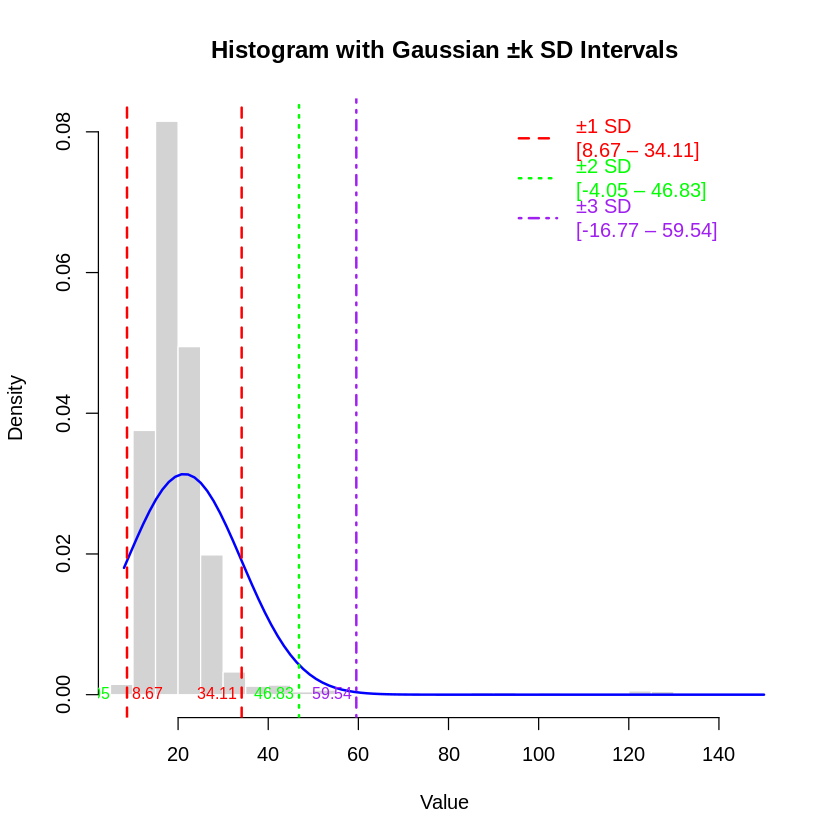

Coverage vs. Chebyshev Lower Bound:
k = 1: Empirical = 96.23%, Chebyshev bound = 0.00%
k = 2: Empirical = 97.84%, Chebyshev bound = 75.00%
k = 3: Empirical = 98.41%, Chebyshev bound = 88.89%


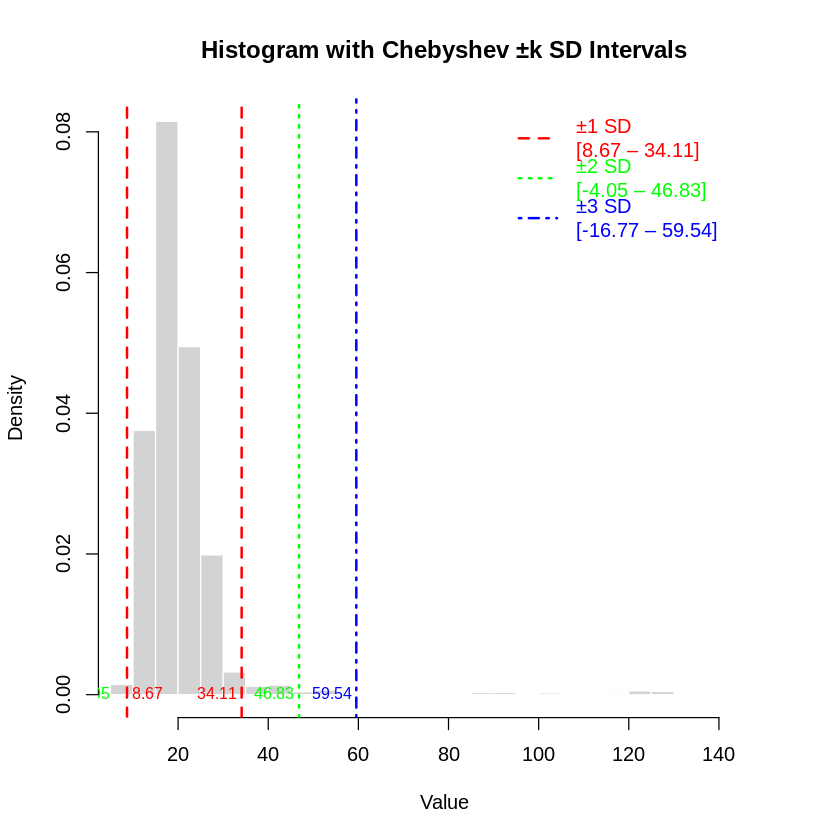

Empirical coverage:
k = 1 (±1 SD): 91.34% of data
k = 2 (±2 SD): 98.16% of data
k = 3 (±3 SD): 98.41% of data


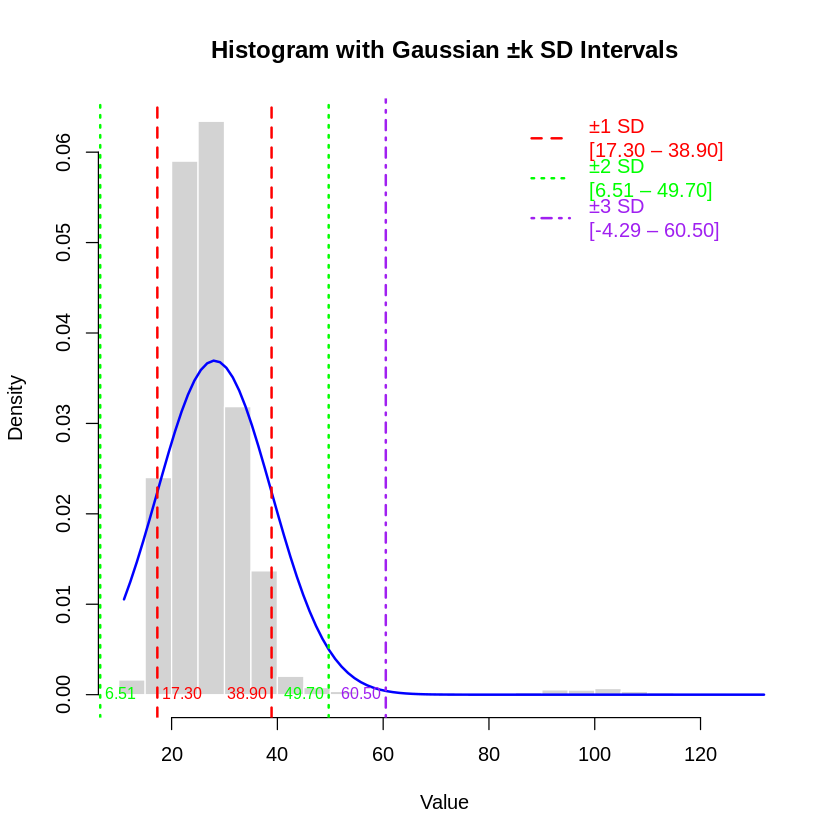

Coverage vs. Chebyshev Lower Bound:
k = 1: Empirical = 91.34%, Chebyshev bound = 0.00%
k = 2: Empirical = 98.16%, Chebyshev bound = 75.00%
k = 3: Empirical = 98.41%, Chebyshev bound = 88.89%


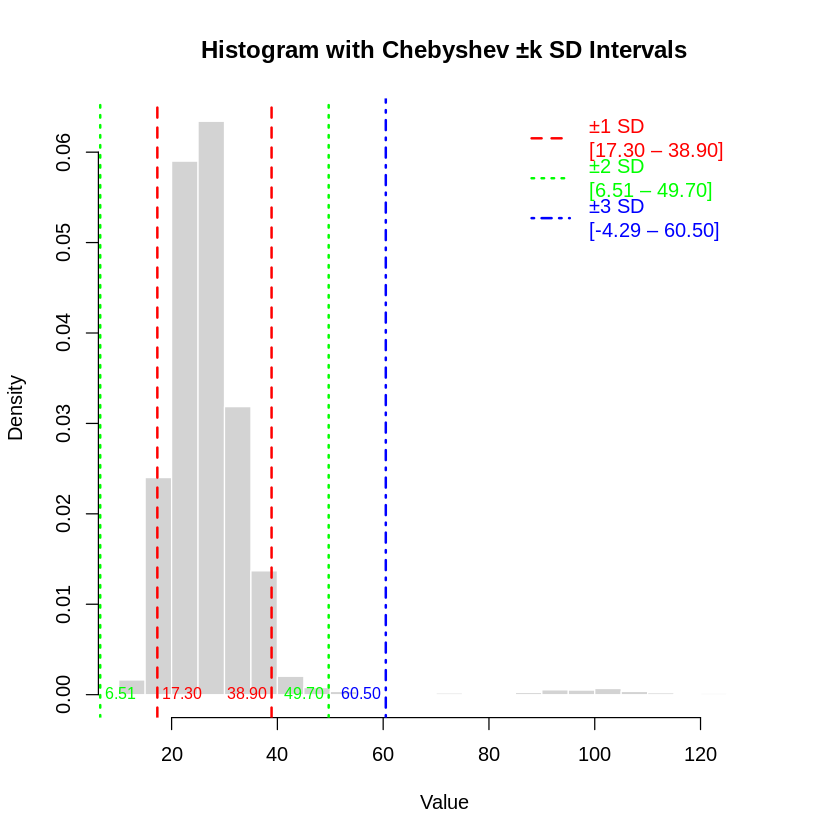

In [15]:
epa_data %>%
  summarise(var_city_epa = var(city, na.rm = T),
            sd_city_epa = sd(city, na.rm = T),
            var_hwy_epa = var(hwy, na.rm = T),
            sd_hwy_epa = sd(hwy, na.rm = T))


empiricalRuleGaussian(epa_data$city)
chebyshevRule(epa_data$city)
empiricalRuleGaussian(epa_data$hwy)
chebyshevRule(epa_data$hwy)

#Empirical rule is severely violated as data are positively skewed. Chebyshev rule is always satisfied but too conservative.


### **Question 4**

Compute the three quartiles and interquartile ranges for EPA city and highway mileage. Then, create side-by-side boxplots to visually compare city and highway mileage.

**Hint**: We may need a long format data frame to side-by-side boxplots.


city_Q1,city_Q2,city_Q3,city_IQR,hwy_Q1,hwy_Q2,hwy_Q3,hwy_IQR
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16,19,23,7,23,27,31,8


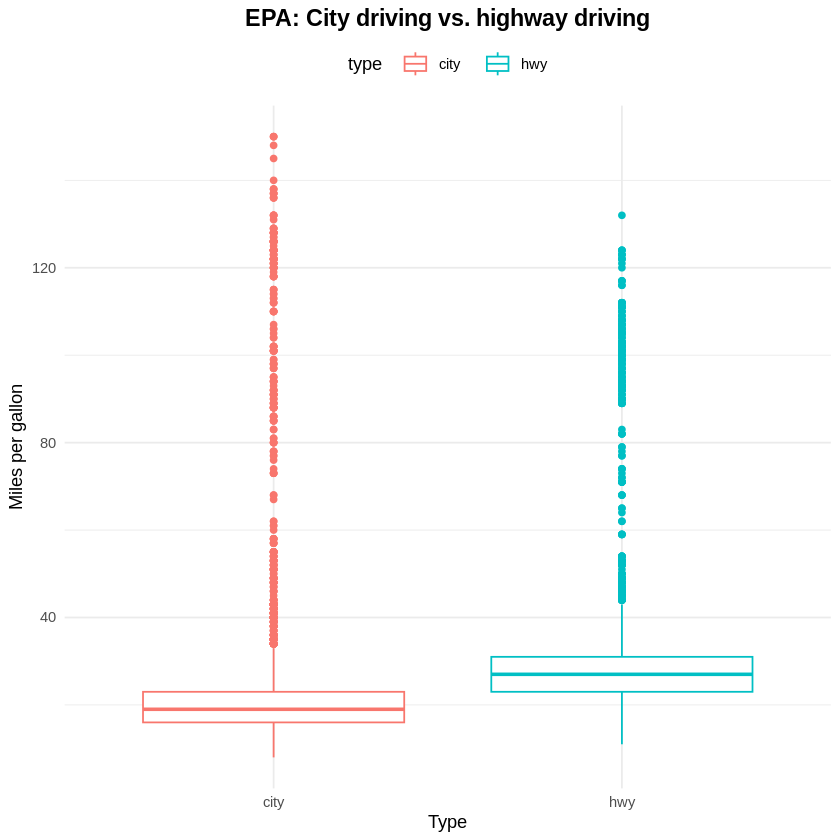

In [16]:
epa_data %>%
  summarise(
    city_Q1 = quantile(city, 0.25, na.rm = TRUE),
    city_Q2 = quantile(city, 0.50, na.rm = TRUE),
    city_Q3 = quantile(city, 0.75, na.rm = TRUE),
    city_IQR = IQR(city, na.rm = TRUE),

    hwy_Q1 = quantile(hwy, 0.25, na.rm = TRUE),
    hwy_Q2 = quantile(hwy, 0.50, na.rm = TRUE),
    hwy_Q3 = quantile(hwy, 0.75, na.rm = TRUE),
    hwy_IQR = IQR(hwy, na.rm = TRUE)
  )



epa_data %>%
  pivot_longer(cols = c(city, hwy),
               names_to = "type",
               values_to = "value") %>% #long-format df
  ggplot(aes(x = type, y = value, colour = type)) +
  geom_boxplot() +
  labs(title = "EPA: City driving vs. highway driving",
       x = "Type", y = "Miles per gallon") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
        legend.position = "top")

